In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
from statsmodels.tsa import seasonal

In [3]:
AK_47 = pd.read_csv('AK_47 Google Trends.csv', parse_dates = ['period'])

In [4]:
AK_47['period'] = AK_47['period'].dt.date

In [5]:
AK_47.set_index('period', inplace=True)

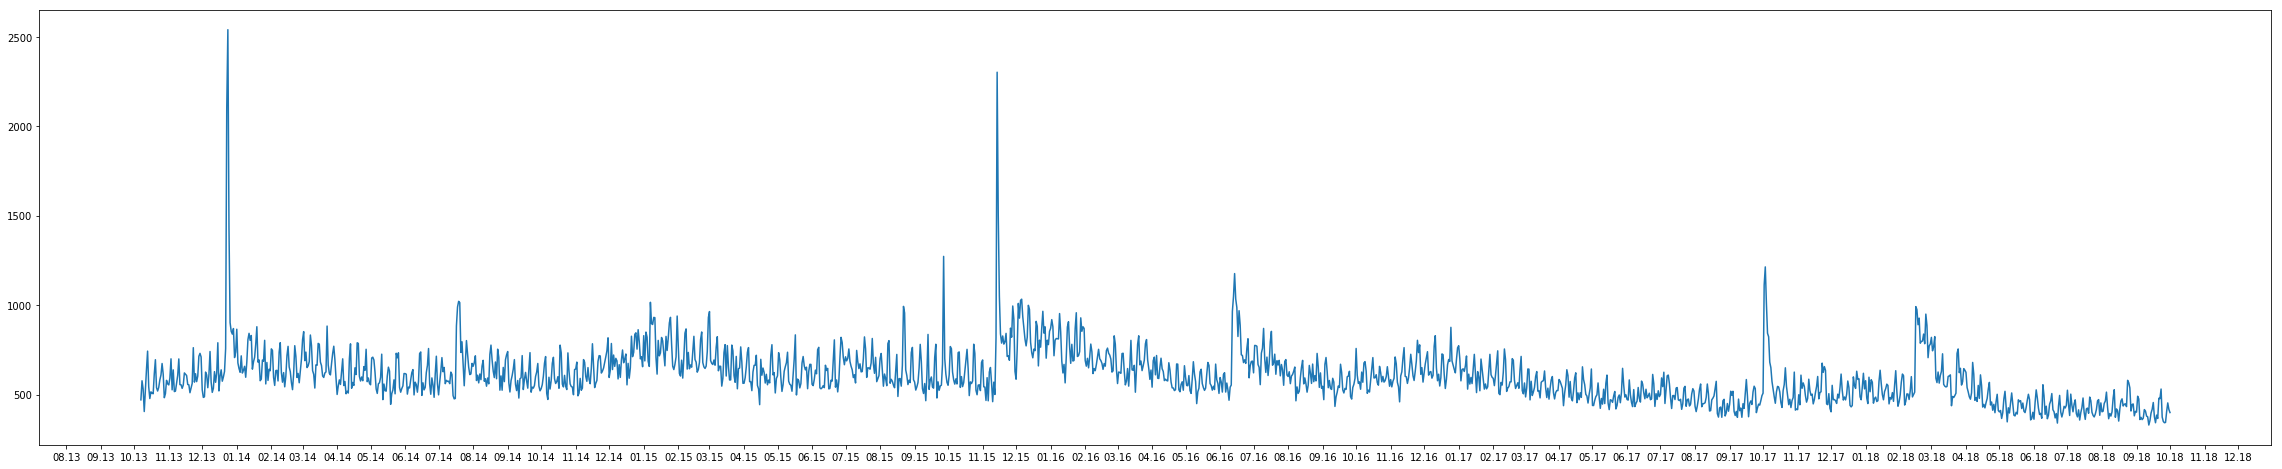

In [12]:
dimensions = (40,8)
fig, ax = pyplot.subplots(figsize=dimensions)

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearmonth = mdates.DateFormatter('%m.%y')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearmonth)

ax.plot(AK_47.index, AK_47['value'])

In [8]:
decompose_model = seasonal.seasonal_decompose(AK_47['value'].tolist(), freq=365, model='additive')

dir(decompose_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

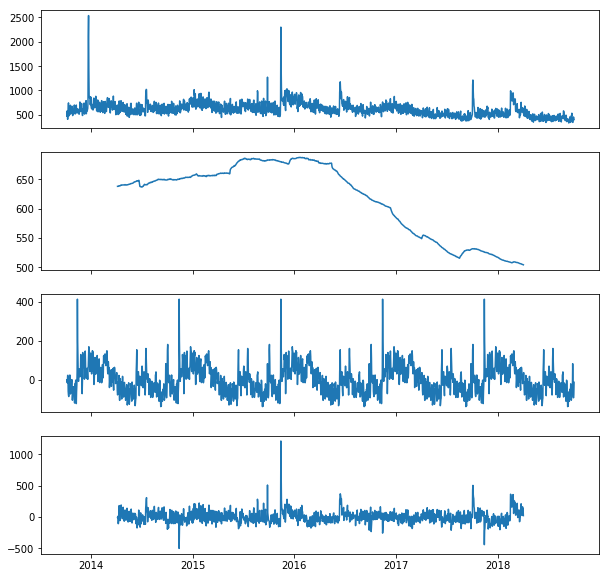

In [10]:
dimensions = (10,10)
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize=dimensions, sharex = 'all')

ax1.plot(AK_47.index, AK_47['value'])
ax2.plot(AK_47.index, decompose_model.trend)
ax3.plot(AK_47.index, decompose_model.seasonal)
ax4.plot(AK_47.index, decompose_model.resid)

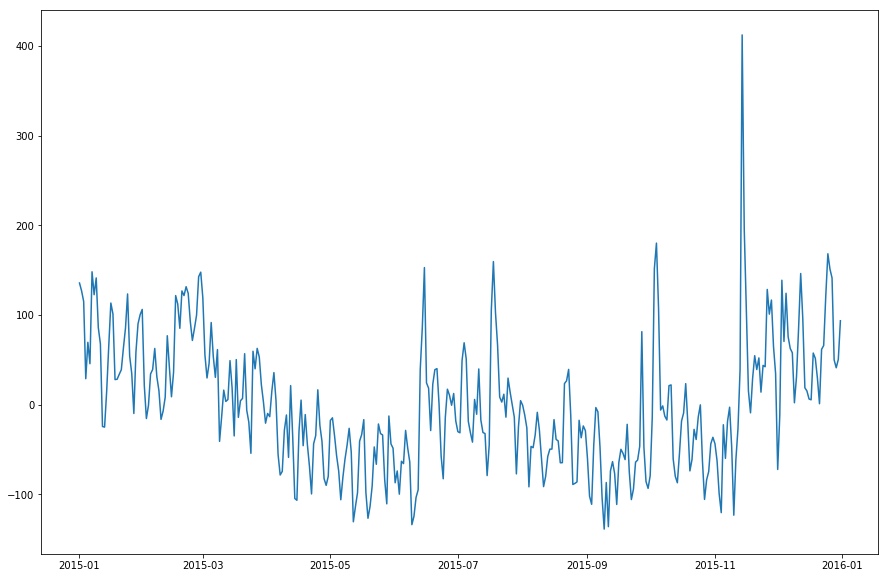

In [11]:
# Seasonal Trends for 2015
AK_47['seasonal'] = decompose_model.seasonal

startdate = pd.to_datetime("2015-01-01").date()
enddate = pd.to_datetime("2015-12-31").date()

oneyear = AK_47.loc[startdate:enddate]

dimensions = (15,10)
fig, ax1 = pyplot.subplots(figsize=dimensions)

pyplot.plot(oneyear.index, oneyear.seasonal)